# Underfitting vs. Overfitting in Machine Learning

In machine learning, two common pitfalls during model training are **underfitting** and **overfitting**. Understanding these issues and how to address them is essential for building models that generalize well to new data.

- **Underfitting (High Bias):**  
  The model is too simple to capture the underlying trends in the data. This results in poor performance on both the training set and unseen data.

- **Overfitting (High Variance):**  
  The model learns the noise in the training data in addition to the underlying trend. Although it performs exceptionally well on the training set, its performance on new data is poor.

- **Ideal Model (Just Right):**  
  Strikes a balance between bias and variance. It captures the essential patterns without being overly complex, thereby generalizing well.

### The Goldilocks Principle

- **Underfitting:** Like a bowl of porridge that's too cold – the model is too simplistic.
- **Overfitting:** Like a bowl of porridge that's too hot – the model is overly complex.
- **Just Right:** Like a bowl of porridge that's perfectly warm – the model balances complexity and simplicity.

---

## Illustrative Examples

### 1. Regression Example: Predicting Housing Prices

Consider predicting housing prices with different levels of model complexity. The table below summarizes the effects:

| **Model Type**     | **Features Used**                | **Fit to Training Data**       | **Generalization** |
|--------------------|----------------------------------|--------------------------------|--------------------|
| **Underfitting**   | Linear ($x$)                     | Poor (misses curvature)        | Poor               |
| **Just Right**     | Quadratic ($x$, $x^2$)            | Good (balanced fit)            | Good               |
| **Overfitting**    | Fourth-order ($x$, $x^2$, $x^3$, $x^4$) | Perfect fit (excessively complex) | Poor         |

*Example Explanation:*  
A linear model may fail to capture the curvature in housing prices, leading to underfitting, whereas a fourth-order polynomial might capture every fluctuation in the training data (including noise), resulting in overfitting. A quadratic model might offer the right balance.

### 2. Classification Example: Classifying Tumors

Suppose we want to classify tumors (malignant vs. benign) using two features:
- $x_1$: Tumor size  
- $x_2$: Patient age

#### Logistic Regression Variants

1. **Simple Logistic Regression:**  
   - **Model:**  

$$
g(z) = \frac{1}{1+e^{-z}}, \quad \text{with} \quad z = \theta_0 + \theta_1 x_1 + \theta_2 x_2.
$$

   - **Decision Boundary:** A straight line ($z=0$).  
   - **Outcome:** **Underfitting** – the simple linear boundary may not capture the true separation between classes.

2. **Quadratic Logistic Regression:**  
   - **Model Extension:** Include quadratic terms such as $x_1^2$, $x_2^2$, and interaction $x_1x_2$.  
   - **Decision Boundary:** A curved line (e.g., elliptical), which can better separate the classes.  
   - **Outcome:** **Balanced fit** – the model generalizes well without being too simple or overly complex.

3. **High-Order Polynomial Logistic Regression:**  
   - **Model Extension:** Incorporate many higher-order polynomial features.  
   - **Outcome:** **Overfitting** – the decision boundary becomes overly contorted, fitting the training data too closely and likely failing on new data.

---

## Strategies to Address Overfitting

Overfitting arises when a model learns the noise in the training data rather than the underlying distribution. Three primary strategies to mitigate overfitting are:

### 1. Collect More Training Data

- **Idea:**  
  More data provides a better representation of the true data distribution, which helps the model learn a smoother, more general function.
  
- **Example:**  
  In housing price prediction, increasing the dataset size can help the model avoid being misled by outliers.

### 2. Feature Selection (Use Fewer Features)

- **Idea:**  
  By using only the most relevant features, you reduce model complexity, thereby decreasing the risk of overfitting.
  
- **Approaches:**
  - **Manual Selection:** Use domain expertise to choose key features.
  - **Automated Methods:** Algorithms can help identify the most informative features.
  
- **Example:**  
  Instead of using 100 features, selecting features like house size, number of bedrooms, and age can improve the model's ability to generalize.

### 3. Regularization

Regularization adds a penalty to the cost function to discourage overly large weights, thereby controlling model complexity.

---

## Regularization in Machine Learning Models

Regularization can be applied to both linear and logistic regression models. The core idea is to modify the cost function by adding a penalty term proportional to the square of the weights.

### Regularization in Linear Regression

**Standard Cost Function:**

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2,
$$

where:
- $m$ is the number of training examples.
- $h_\theta(x)$ is the hypothesis function.

**Regularized Cost Function:**

$$
J_{\text{reg}}(\theta) = \frac{1}{2m} \left[ \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2 + \lambda \sum_{j=1}^{n} \theta_j^2 \right],
$$

where:
- $\lambda$ is the regularization parameter.
- The summation for regularization is typically applied to all weights $\theta_j$ (excluding the bias term $\theta_0$).

**Gradient Descent Updates:**

- **For each weight $w_j$ ($j \geq 1$):**

$$
w_j := w_j - \alpha \left[ \frac{1}{m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)x_j^{(i)} + \frac{\lambda}{m}w_j \right],
$$

- **For the bias term $b$ (or $\theta_0$):**

$$
b := b - \alpha \left[ \frac{1}{m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right) \right].
$$

**Interpretation:**  
The additional term $\frac{\lambda}{m}w_j$ in the gradient update acts as a **shrinkage factor** on the weights, gradually reducing their magnitude and thus preventing the model from becoming too complex.

---

### Regularization in Logistic Regression

Logistic regression uses a sigmoid function for predictions. The approach to regularization is similar to linear regression.

**Unregularized Logistic Regression Cost Function:**

$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log f(z^{(i)}) + (1 - y^{(i)}) \log \left(1 - f(z^{(i)})\right) \right],
$$

where:
- $f(z) = \frac{1}{1 + e^{-z}}$ is the sigmoid function.
- $z = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots$

**Regularized Cost Function:**

$$
J_{\text{reg}}(\theta) = J(\theta) + \frac{\lambda}{2m} \sum_{j=1}^{n} w_j^2.
$$

**Gradient Descent Updates:**

- **For each weight $w_j$ ($j \geq 1$):**

$$
w_j := w_j - \alpha \left[ \frac{1}{m} \sum_{i=1}^{m} \left( f(z^{(i)}) - y^{(i)} \right)x_j^{(i)} + \frac{\lambda}{m}w_j \right],
$$

- **For the bias term $b$:**

$$
b := b - \alpha \left[ \frac{1}{m} \sum_{i=1}^{m} \left( f(z^{(i)}) - y^{(i)} \right) \right].
$$

> **Note:** In both linear and logistic regression, the bias term is **not regularized**.

---

## Summary

- **Underfitting** arises when the model is too simple (high bias), while **overfitting** occurs when the model is too complex (high variance).
- The goal is to achieve a **balanced model** that generalizes well.
- **Regularization** is an effective strategy to prevent overfitting by penalizing large weights, which keeps the model simpler.
- Both linear and logistic regression models can be regularized by modifying their cost functions and gradient descent updates.

By applying these strategies—collecting more data, selecting relevant features, and using regularization—you can build robust models that perform well on both training and unseen data.


# Strategies to Address Overfitting

Remember that overfitting occurs when a model fits the training data too well, capturing noise instead of the underlying distribution, leading to poor generalization to new data.

**Three Main Strategies to Combat Overfitting:**
1. **Collect More Training Data**
2. **Feature Selection (Use Fewer Features)**
3. **Regularization**

## 1. Collect More Training Data

Increasing the number of training examples helps the algorithm learn a function that is smoother and less wiggly.
- **Advantage:** A larger dataset provides a better representation of the true underlying distribution, which can prevent the model from fitting noise.
- **Limitation:** More data may not be available in some scenarios (e.g., limited sales data in a small market).

**Practical Example:**  

For housing price prediction: If you currently have limited data on house sizes and prices, adding more examples can help the model avoid overreacting to outliers or noise in a small dataset.

---

## 2. Feature Selection (Using Fewer Features)

By selecting only the most relevant features, you reduce the complexity of the model, thereby reducing its tendency to overfit.

- **Manual Feature Selection:**  Use your domain intuition to select features that are most relevant.
- **Pros:** Reduces overfitting by lowering model complexity.
- **Cons:** May discard potentially useful information.
- **Automated Methods:** Later in the course, you will explore algorithms that automatically choose the most appropriate set of features.

**Example Scenario:**  
- **With Many Features:** A model using 100 features (e.g., house size, number of bedrooms, age, income level in the neighborhood, distance to the nearest coffee shop, etc.) might overfit if there isn’t enough training data.
- **With Fewer Features:** Choosing a subset like **size**, **number of bedrooms**, and **age** might help the model generalize better.

---

## 3. Regularization

Regularization is a technique that shrinks the values of the model parameters, effectively reducing the impact of less important features without completely eliminating them.

When using polynomial features (e.g., $x$, $x^2$, $x^3$, etc.), the parameters (weights) for higher-order terms can become very large. **Regularization** adds a penalty for large parameter values, encouraging the model to keep the parameters small and the decision boundary smoother.

Imagine dimming a set of overly bright lights; you don't turn them off completely, but you reduce their intensity so they don't overwhelm the overall lighting.

**Mathematical Formulation (General Idea):**  

If the cost function for a model is:

$$ J(\theta) = \text{Loss}(\theta) $$

Regularization adds a term such as:

$$ J_{\text{reg}}(\theta) = \text{Loss}(\theta) + \lambda \sum_{j=1}^{n} \theta_j^2 $$

Here, $\lambda$ is a hyperparameter that controls the amount of regularization.
  
**Parameter Considerations:**
- Typically, only the weights $w_1, w_2, \dots, w_n$ are regularized.
- The bias term $b$ is usually excluded or not heavily regularized.

**Benefits:**  
- Allows the use of all features while preventing any single feature from having an overly large impact.
- **Flexibility:** Unlike feature selection, regularization doesn't completely remove a feature; it just reduces its influence.


# Regularization: Modifying the Cost Function

**Goal:** Keep the parameters ($W_1, W_2, \dots, W_N$) small to prevent the model from becoming overly complex and overfitting the training data.

**Example Recap:**  
- **Quadratic Fit:** A quadratic function can provide a good fit for the data.
- **High-Order Polynomial Fit:** A high-order polynomial may overfit the data by being too wiggly.

**Key Idea:** If you penalize large values for specific parameters (e.g., $W_3$ and $W_4$), they are forced to be close to zero, effectively reducing the contribution of higher-order (or less important) features.

---

## Modified Cost Function

**Standard Linear Regression Cost Function:**

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2 $$

**Modified Cost Function:**

$$ J_{\text{reg}}(\theta) = \frac{1}{2m} \left[ \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2 + \lambda \sum_{j=1}^{n} \theta_j^2 \right] $$
  
**Components:**
- **Mean Squared Error Term:** Encourages the model to fit the training data well.
- **Regularization Term:** $\lambda \sum_{j=1}^{n} \theta_j^2$ penalizes large parameter values, effectively shrinking them.
  
**Notes on Conventions:**
- The term is often scaled by $\frac{\lambda}{2m}$ so both components are on a similar scale.
- By convention, **do not regularize the bias term** ($b$ or $\theta_0$), though some implementations might include it; the difference is usually minimal.

---

## Trade-Off Controlled by $\lambda$

- **$\lambda = 0$:**
  - **Effect:** No regularization applied.
  - **Result:** Model may overfit, especially if it is overly complex.
  
- **$\lambda$ is Very Large (e.g., $10^{10}$):**
  - **Effect:** Heavy penalty on parameter sizes forces all $\theta_j$ (for $j \geq 1$) to be near 0.
  - **Result:** Model becomes overly simple (e.g., a horizontal line) and underfits the data.
  
- **Choosing $\lambda$:**
  - **Balance is Key:** A moderate value of $\lambda$ ensures the model fits the data well while keeping parameters small enough to avoid overfitting.
  - **Model Selection:** Later in the course, techniques for choosing the optimal $\lambda$ will be discussed.

# Gradient Descent with Regularized Linear Regression

The goal is to minimize a modified cost function that includes both the usual squared error term and an additional term to penalize large parameter values, thereby reducing overfitting.

---

## Regularized Cost Function

The **unregularized cost function** for linear regression is:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2
$$

The **modified (regularized) cost function** becomes:

$$
J_{\text{reg}}(\theta) = \frac{1}{2m} \left[ \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2 + \lambda \sum_{j=1}^{n} \theta_j^2 \right]
$$

**Components:**
- **Error Term:** Measures the squared difference between predictions and actual values.
- **Regularization Term:** $\lambda \sum_{j=1}^{n} \theta_j^2$ penalizes large weights to keep the model simpler.

**Conventions:**
- We scale by $\frac{1}{2m}$ for both terms to keep them on a similar scale.
- **Bias term ($b$ or $\theta_0$)** is not regularized.

---

## Gradient Descent Updates

For **standard gradient descent**:

**For each weight $w_j$ ($j = 1, 2, \dots, n$):**

$$
w_j := w_j - \alpha \cdot \frac{\partial J}{\partial w_j}
$$

**For bias $b$:**

$$
b := b - \alpha \cdot \frac{\partial J}{\partial b}
$$

**With regularization**, the derivative for $w_j$ changes while $b$ remains the same.

**New Partial Derivative for $w_j$:**

$$
  \frac{\partial J_{\text{reg}}}{\partial w_j} = \frac{1}{m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)x_j^{(i)} + \frac{\lambda}{m}w_j
$$

**Update Rule for $w_j$:**

$$
w_j := w_j - \alpha \left[ \frac{1}{m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)x_j^{(i)} + \frac{\lambda}{m}w_j \right]
$$

**Update Rule for $b$:**
$$
b := b - \alpha \cdot \frac{1}{m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)
$$

> **Note:** The bias term $b$ is not regularized.

---

## Intuition Behind the Update

The update rule for $w_j$ can be rearranged as follows:

$$
w_j := \left(1 - \alpha \frac{\lambda}{m}\right) w_j - \alpha \cdot \frac{1}{m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)x_j^{(i)}
$$

**Interpretation:**
- **Shrinkage Factor:** The term $\left(1 - \alpha \frac{\lambda}{m}\right)$ multiplies $w_j$ at every iteration, gradually shrinking it.  

**Example:** With $\alpha = 0.01$, $\lambda = 1$, and $m = 50$, we get:

$$
1 - \alpha \frac{\lambda}{m} = 1 - \frac{0.01}{50} = 0.9998
$$

Thus, on each iteration, $w_j$ is scaled by approximately 0.9998.

**Usual Gradient Descent Component:** The remaining term is the standard gradient descent update for unregularized linear regression.

**Effect:** Regularization slowly reduces the magnitude of the weights, helping to control model complexity and prevent overfitting.

---

## Derivative Calculation Overview

Here's a brief look at how the derivative with respect to $w_j$ is derived:
1. **Start with the cost function:**

$$
J_{\text{reg}}(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2 + \frac{\lambda}{2m} \sum_{j=1}^{n} w_j^2
$$

2. **Differentiate with respect to $w_j$:**

For the error term, using the chain rule, you obtain:
$$
\frac{1}{m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)x_j^{(i)}
$$

For the regularization term:
$$
\frac{\partial}{\partial w_j} \left( \frac{\lambda}{2m} w_j^2 \right) = \frac{\lambda}{m} w_j
$$

3. **Combine the two derivatives to yield:**

$$
\frac{\partial J_{\text{reg}}}{\partial w_j} = \frac{1}{m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)x_j^{(i)} + \frac{\lambda}{m} w_j
$$

> **Note:** The bias term $b$ is unaffected by regularization.

---

## 5. Summary

- **Objective:** Modify gradient descent to work with a regularized cost function that prevents overfitting by keeping weights small.
- **Key Changes:**
  - **Cost Function:** Augmented with a regularization term: $\frac{\lambda}{2m} \sum_{j=1}^{n} w_j^2$.
  - **Gradient Update for Weights:** Incorporates an extra term $\frac{\lambda}{m}w_j$, leading to a multiplicative shrinkage factor.
  - **Bias Term:** Remains unchanged (not regularized).

- **Impact on Learning:**
  - Regularization helps control model complexity.
  - Choosing appropriate $\lambda$ balances the trade-off between fitting the data and keeping the model simple.

# Regularized Logistic Regression

How to implement regularized logistic regression using gradient descent? 

The approach is very similar to regularized linear regression, with the main difference being the use of the logistic (sigmoid) function for predictions.

- **Problem:** Logistic regression with many features (especially high-order polynomial features) can overfit the training data, resulting in an overly complex decision boundary.
- **Solution:** Apply regularization by adding a penalty term to the cost function to keep the parameter values small. This helps to generalize better to new data.

---

## Cost Function with Regularization

- **Unregularized Cost Function:**

$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log f(z^{(i)}) + (1-y^{(i)}) \log (1 - f(z^{(i)})) \right]
$$

where:
- $f(z) = \frac{1}{1 + e^{-z}}$ (the sigmoid function)
- $z$ is typically a high-order polynomial in the features

**Modified Cost Function:**

$$
J_{\text{reg}}(\theta) = J(\theta) + \frac{\lambda}{2m} \sum_{j=1}^{n} w_j^2
$$

**Explanation:**
- The first part is the usual logistic regression cost.
- The second part is the regularization term:
  - $\lambda$ is the regularization parameter controlling the strength of the penalty.
  - The sum runs over all feature weights ($w_1, w_2, \dots, w_n$), excluding the bias term $b$.

**Effect:** Penalizes large weights, thereby simplifying the decision boundary and reducing overfitting.

---

## Gradient Descent Updates for Regularized Logistic Regression

**For each weight $w_j$ ($j = 1, 2, \dots, n$):**

$$
w_j := w_j - \alpha \left[ \frac{1}{m} \sum_{i=1}^{m} \left( f(z^{(i)}) - y^{(i)} \right)x_j^{(i)} + \frac{\lambda}{m}w_j \right]
$$

- The term $\frac{\lambda}{m}w_j$ is the additional derivative coming from the regularization term.
- This update is similar to that of regularized linear regression, except that:
    - $f(z)$ now represents the logistic function.
    - The standard gradient descent term for logistic regression is used.

**For the bias term $b$:**
$$
b := b - \alpha \left[ \frac{1}{m} \sum_{i=1}^{m} \left( f(z^{(i)}) - y^{(i)} \right) \right]
$$

> **Note:** The bias term is **not regularized.**

### Key Points

- **Similarity to Linear Regression:** The gradient update equations are nearly identical to those for regularized linear regression, with the only difference being the hypothesis function (sigmoid for logistic regression vs. linear for regression).
- **Regularization Effect:** Regularization shrinks the weights by adding a term proportional to the weight value itself, thereby reducing overfitting.

---

## Practical Implementation

**Implementation Tips:**
- Ensure that the updates for all parameters ($w_j$ and $b$) are done **simultaneously.**
- Choose an appropriate value for $\lambda$:
    - **Too low ($\lambda = 0$):** No regularization; the model may overfit.
    - **Too high (e.g., $\lambda \gg 1$):** Excessive shrinkage, leading to underfitting.
- In the practice lab, you will have the opportunity to experiment with different $\lambda$ values to observe their effect on the decision boundary.

> **[!TIP] Real-World Application**
>  
> Many companies leverage regularized logistic regression to ensure that their models generalize well, which is critical for applications such as fraud detection, medical diagnosis, and more. Your ability to implement and tune these models can lead to significant real-world value.

---


# Adding Regularization To Logistic Regression Model

Now let's add regularization to our algorithms:

In [138]:
import numpy as np

In [481]:
X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
y = np.array([0, 0, 0, 1, 1, 1]).reshape(-1, 1) # Ensure it is a 2D array

In [482]:
def sigmoid(z):
    """
    Computes the sigmoid of a given value.
    """

    return 1 / (1 + np.exp(-z))

In [483]:
def predict(X, theta):
    """
    Predicts the target value for logistic regression using given input and parameters.
    """

    return sigmoid(X @ theta)

In [484]:
def compute_cost(X, y, theta, lam = 0.1):
    """
    Computes the cost for logistic regression model.
    """
    m = X.shape[0]
    predictions = predict(X, theta)
    cost = (-1/m) * (np.dot(y.T, np.log(predictions)) + np.dot((1 - y.T), np.log(1 - predictions)))
    reg_cost = (lam / (2*m)) * np.sum(theta[1:] ** 2)

    cost = cost + reg_cost
    return cost.item()



In [485]:
theta_tmp = np.array([-3, 1, 1]).reshape(-1, 1)
# theta_tmp = np.array([-3, 1, 1])[:, np.newaxis (Or None)]
print(compute_cost(X, y, theta_tmp))

0.38353345307218406


In [506]:
def gradient_descent(X, y, epochs = 10_000, alpha=0.01, lam=0.1, epsilon=0.0001):
    """
    Performs gradient descent to find optimal model parameters.
    """
    
    m, n = X.shape
    theta = np.random.rand(n, 1)
    cost_history = []
    previous_cost = float('inf')
    
    for i in range(epochs):
        # Compute predictions and error
        predictions = predict(X, theta)
        errors = predictions - y

        # Compute gradient
        grad = (X.T @ errors) / m
        reg_grad = (lam / m) * np.r_[np.zeros((1, 1)), theta[1:]]
        grad = grad + reg_grad
        theta -= alpha * grad

        # Compute cost
        cost = compute_cost(X, y, theta, lam)
        cost_history.append(cost)

        # Check for early exit
        if abs(previous_cost - cost) < epsilon:
            print(f"Convergence reached at epoch {i}")
            break

        previous_cost = cost

        
    return theta, cost_history

In [517]:
theta, cost_history = gradient_descent(X, y, epsilon=0.00001)
print("Optimal parameters are:", theta.flatten())
print("Final Cost:", cost_history[-1])
predictions = (predict(X, theta) >= 0.5).astype(int)
print("Model Accuracy:", np.mean(predictions == y) * 100)

Convergence reached at epoch 8395
Optimal parameters are: [-4.68663494  1.83289516  1.61060147]
Final Cost: 0.26931920403781223
Model Accuracy: 100.0


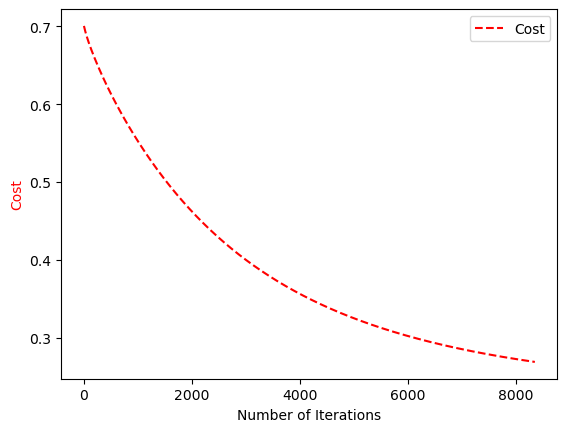

In [508]:
import matplotlib.pyplot as plt

plt.plot(cost_history, c="red", linestyle="--", label="Cost")
plt.ylabel("Cost", c="red")
plt.xlabel("Number of Iterations")
plt.legend()